# Dynamic Resonances

This notebook shows how to obtain dynamic resonances from the discrete resonance spectrogram of a signal.

## 1. Imports

First we import the library of functions.

In [2]:
from utilities_store import *

## 2. Obtain spectrogram of the signal

First we obtain the spectrogram of the signal.

In [5]:
spectrogram, signal = get_spectrogram('/input/scores/violin_canonD_1.wav', N = 200, step_size = 250, 
                                          power_threshold = 1e-9, amp_threshold = 1e-8)

FileNotFoundError: [Errno 2] No such file or directory: './fpt/data/input/scores/violin_canonD_1.wav'

Plot the original resonance spectrogram.

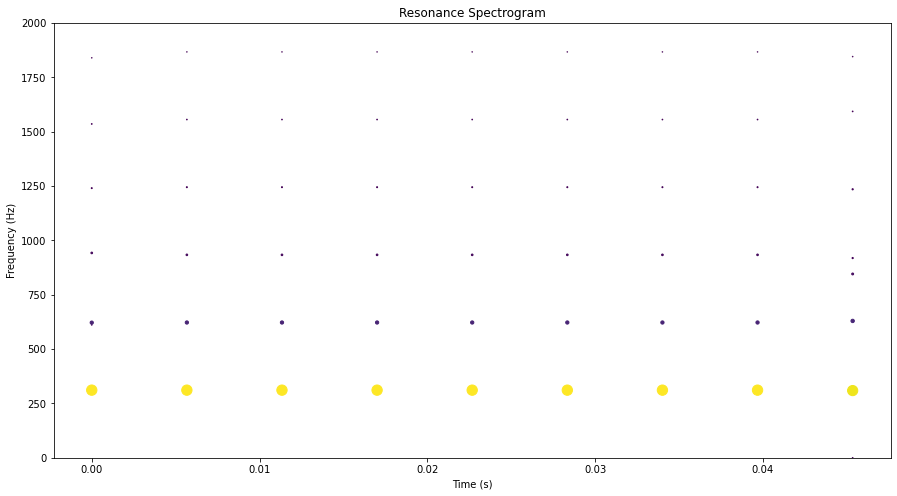

In [4]:
plot_spectrogram(spectrogram, max_freq = 2000, scale=100)

In [5]:
res_set = ResonanceSet(np.array([spectrogram]), np.array(spectrogram.onsets[0]))

# One resonance

fRes = res_set.elements[0][1].elements
candidateRes = res_set.elements[0][2].elements

# find a specific parameter
#res_set.elements[0][1].elements.d

#harmonic_mean_distance(res, candidates, forward, alpha=100, beta=1)
harmonic_mean_distance(fRes, candidateRes, True, alpha=100, beta=1)

#spectrogram.elements[0]

0.010579527200452004

## 3. Obtain the dynamic resonances

Next we obtain the dynamic resonances. The main parameter of this function is the distance measure. This parameter defines the formula used to calculate the distance (spectral similarity) between two resonances. We have developped six different distance measures:

    - Frequency distance.
    - Harmonic mean of the dk and wk coefficients.
    - Residue of the product of the resonances.
    - Residue of the product of the resonances weighted by power.
    - Residue of the product of the resonances multiplied by the spectra transference function.
    - Residue of the product of the resonances multiplied by the spectra transference function weighted by power.
    
In this example we use the Residue Power distance measure to obtain the dynamic resonances.

In [6]:
dyns = get_dynamic_resonances(spectrogram, min_overlap = 1e-15, overlap_type = "exponential", freq_ratio = 15, 
                              mode = 'forward', multiple_match = False, distance = 'residue_power')



Resonance(d=(-0.3192955394320076-0.07525904225818593j), w=(1955.2185696532074-1.4822273182449885j), z=(0.9989837425587844-0.044320008675167805j), N=250, sample_rate=44100)
Resonance(d=(0.04725513711892747-0.3228752933144131j), w=(1954.8710368925108-0.005146861985636073j), z=(0.9990175522158551-0.044313620331579436j), N=250, sample_rate=44100)
Resonance(d=(-0.319295539432007+0.07525904225818705j), w=(-1955.2185696532074-1.4822273182449885j), z=(0.9989837425587844+0.044320008675167805j), N=250, sample_rate=44100)
Resonance(d=(0.04725513711892747+0.3228752933144131j), w=(-1954.8710368925108-0.005146861985636073j), z=(0.9990175522158551+0.044313620331579436j), N=250, sample_rate=44100)
Resonance(d=(0.07860318458652502-0.05711293688759202j), w=(-3906.160600925694+16.257481062582368j), z=(0.9964470653498654+0.08849191238242249j), N=250, sample_rate=44100)
Resonance(d=(-0.09213248408102032+0.045816108241185295j), w=(-3909.714723701904-0.05320543771467719j), z=(0.9960714583668903+0.08853946512

/Users/nastysushi/Mirror/_MULTIMEDIA/THESIS/thesis/github/fpt/utilities_store.py:442: RuntimeWarning: divide by zero encountered in double_scalars
  res_other.frequency / res.frequency > (1 / freq_ratio) and
/Users/nastysushi/Mirror/_MULTIMEDIA/THESIS/thesis/github/fpt/utilities_store.py:443: RuntimeWarning: divide by zero encountered in double_scalars
  res_other.frequency / res.frequency < (freq_ratio))



Resonance(d=(-0.0026214718764004416+0.001295579320199916j), w=(-33232.63307739697-1.0388042361697658j), z=(0.729230541017065+0.6842336646602907j), N=250, sample_rate=44100)
Resonance(d=(-0.0008816870775939932+0.003479600503792054j), w=(-29323.700768508774+0.3767143184322447j), z=(0.7869626735702958+0.6170144529122656j), N=250, sample_rate=44100)
Resonance(d=(-8.576496913555642e-05-0.003596526175461711j), w=(-29322.40829359778-0.10805076288315507j), z=(0.7869721058174933+0.6169846063037805j), N=250, sample_rate=44100)
Resonance(d=(-0.0008816870775939932-0.003479600503792054j), w=(29323.700768508774+0.3767143184322447j), z=(0.7869626735702958-0.6170144529122656j), N=250, sample_rate=44100)
Resonance(d=(-8.576496913555642e-05+0.003596526175461711j), w=(29322.40829359778-0.10805076288315507j), z=(0.7869721058174933-0.6169846063037805j), N=250, sample_rate=44100)
Resonance(d=(0.002344291066891808+0.0022117715962652763j), w=(31278.182113382587-0.8866355145317084j), z=(0.758831484396923-0.65

/Users/nastysushi/Mirror/_MULTIMEDIA/THESIS/thesis/github/fpt/utilities_store.py:762: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ResonanceSet(np.array([dynamic for dynamic in dynamic_resonances]), np.array(dynamic_spec_onsets))


Plot the dynamic resonances:

B
Resonance(d=(-5.5775661690155786e-05+4.883472987314336e-05j), w=(132716.22247123366-352.7959734672889j), z=(-0.9833817794879108-0.13072021854781074j), N=250, sample_rate=44100)
--------------------


IndexError: invalid index to scalar variable.

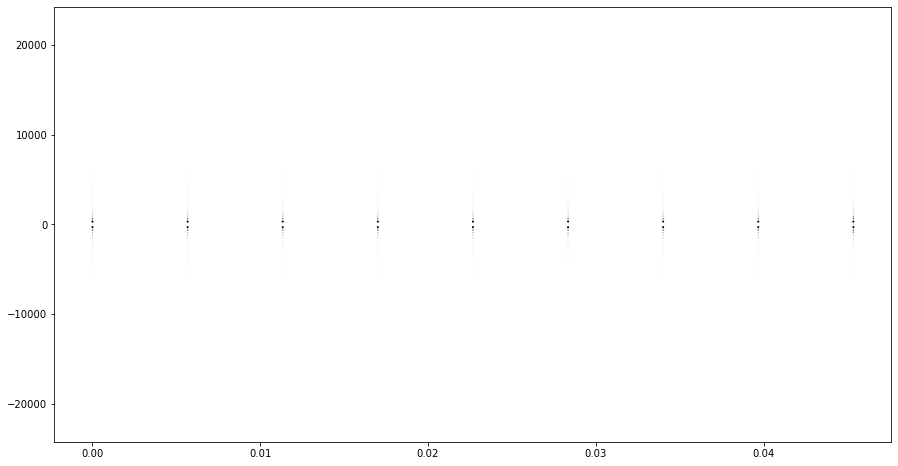

In [8]:
#dyns.elements

plot_dynamic(spectrogram, spectrogram, max_freq = 1000, size = 'power')

## 4. Extend dynamic resonances

Dynamic resonances can be extended with "correcting" resonances that reduce the discontinuitis in the recontruction at the edge of the windows. There exist three methods to extend dynamic resonances:

    - Extension by amplitude correction in the time signal
    - Extension by phase correction in the time signal
    - Extension by decay coefficient. The dynamic resonance is extended with all the resonances in the candidates 
    range that point inwards (damping above center resonance, ramping below center resonance) if the dynamic resonance is 
    decreasing in frequency and vice versa. 

In [9]:
new_dyns = extend_dynamic_res(spectrogram, dyns, step_size = 250, extension_type = 'amplitude',  ratio = 1.3)

TypeError: unhashable type: 'ResonanceSet'

Plot the extended dynamic resonances

In [10]:
plot_dynamic(spectrogram, new_dyns, max_freq = 2000, size = 'power')

NameError: name 'new_dyns' is not defined